In [ ]:
!pip install nltk

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pal = sns.color_palette()
from wordcloud import WordCloud, STOPWORDS

#text preprocessing
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
import string
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import hstack, csr_matrix

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/GuviMentor88/Training-Datasets/refs/heads/main/twitter_training.csv"
df_train = pd.read_csv(url, header=None, names=["Tweet ID", "Entity", "Sentiment", "Tweet Content"])
df_train.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


The dataset appears to be about **sentiment analysis on tweets** related to various entities, including games (like "Borderlands" and "CallOfDuty"), companies (like "Amazon" and "Google"), and products (like "Xbox" and "PlayStation").

- **Columns:**
  1. **Tweet ID:** Unique identifier for the tweet.
  2. **Entity:** The subject of the tweet (e.g., a game, company, or product).
  3. **Sentiment:** The sentiment associated with the tweet (e.g., Positive, Negative, Neutral).
  4. **Tweet Content:** The actual text of the tweet.

- **Purpose:** The dataset is likely used to analyze public sentiment toward these entities based on tweet content.

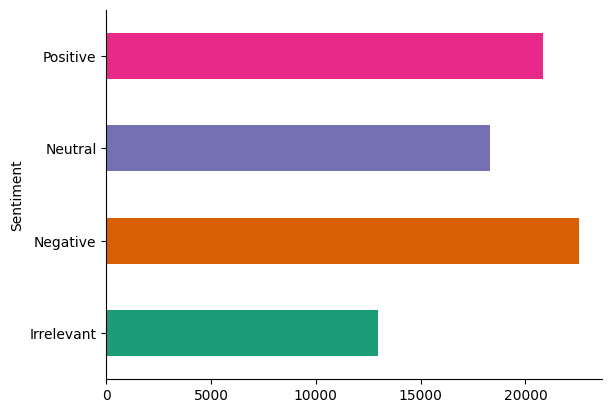

In [ ]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df_train.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_train["Entity"].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

Here’s the combined list with classifications mentioned beside each entity:

1. **Borderlands** - *Game*  
2. **CallOfDutyBlackopsColdWar** - *Game*  
3. **Amazon** - *Company*  
4. **Overwatch** - *Game*  
5. **Xbox(Xseries)** - *Gaming Hardware/Technology*  
6. **NBA2K** - *Game*  
7. **Dota2** - *Game*  
8. **PlayStation5(PS5)** - *Gaming Hardware/Technology*  
9. **WorldOfCraft** - *Game*  
10. **CS-GO** - *Game*  
11. **Google** - *Company/Technology*  
12. **AssassinsCreed** - *Game*  
13. **ApexLegends** - *Game*  
14. **LeagueOfLegends** - *Game*  
15. **Fortnite** - *Game*  
16. **Microsoft** - *Company/Technology*  
17. **Hearthstone** - *Game*  
18. **Battlefield** - *Game*  
19. **PlayerUnknownsBattlegrounds(PUBG)** - *Game*  
20. **Verizon** - *Company*  
21. **HomeDepot** - *Company*  
22. **FIFA** - *Game*  
23. **RedDeadRedemption(RDR)** - *Game*  
24. **CallOfDuty** - *Game*  
25. **TomClancysRainbowSix** - *Game*  
26. **Facebook** - *Company*  
27. **GrandTheftAuto(GTA)** - *Game*  
28. **MaddenNFL** - *Game*  
29. **johnson&johnson** - *Company*  
30. **Cyberpunk2077** - *Game*  
31. **TomClancysGhostRecon** - *Game*  
32. **Nvidia** - *Company/Technology*

### **Summary by Categories:**
- **Games:** Borderlands, CallOfDutyBlackopsColdWar, Overwatch, NBA2K, Dota2, WorldOfCraft, CS-GO, AssassinsCreed, ApexLegends, LeagueOfLegends, Fortnite, Hearthstone, Battlefield, PlayerUnknownsBattlegrounds(PUBG), FIFA, RedDeadRedemption(RDR), CallOfDuty, TomClancysRainbowSix, GrandTheftAuto(GTA), MaddenNFL, Cyberpunk2077, TomClancysGhostRecon.  
- **Gaming Hardware/Technology:** Xbox(Xseries), PlayStation5(PS5), Nvidia.  
- **Companies:** Amazon, Google, Microsoft, Verizon, HomeDepot, Facebook, johnson&johnson.  

In [ ]:
df_train["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [ ]:
# Combine 'Irrelevant' into 'Neutral'
df_train['Sentiment'] = df_train['Sentiment'].replace('Irrelevant', 'Neutral')

# Verify the changes
print(df_train['Sentiment'].unique())
df_train.head()

['Positive' 'Neutral' 'Negative']


,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


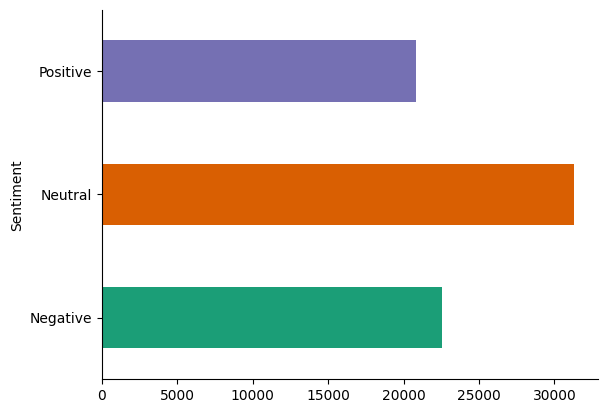

In [ ]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df_train.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_train.columns = df_train.columns.str.strip()


In [ ]:
# Print the first few rows and column names
print(df_train.head())
print(df_train.columns)

# Check for columns containing 'Sentiment'
print([col for col in df_train.columns if 'Sentiment' in col])


   Tweet ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Index(['Tweet ID', 'Entity', 'Sentiment', 'Tweet Content'], dtype='object')
['Sentiment']


In [ ]:
# Count the occurrences of each sentiment class
sentiment_counts = df_train['Sentiment'].value_counts()

# Display the counts
print(sentiment_counts)


Sentiment
Neutral     31308
Negative    22542
Positive    20832
Name: count, dtype: int64


In [ ]:
print(df_train['Sentiment'].isnull().sum())


0


In [ ]:
df_train.shape

(74682, 4)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df_train.isnull().sum().sum()

686

In [ ]:
# Check the count of null values
print(f"Before removal: {df_train.shape}")
print(df_train["Tweet Content"].isnull().sum())

# Remove rows with null 'Tweet Content'
df_train = df_train.dropna(subset=["Tweet Content"])

# Verify the removal
print(f"After removal: {df_train.shape}")
print(df_train["Tweet Content"].isnull().sum())


Before removal: (74682, 4)
686
After removal: (73996, 4)
0


In [ ]:
df_train.isnull().sum().sum()

0

In [ ]:
# Preprocessing
df_train = df_train[["Tweet Content", "Sentiment"]]
df_train = df_train.rename(columns={"Tweet Content": "text", "Sentiment": "label"})

# Encode labels
label_mapping = {"Positive": 2, "Negative": 0, "Neutral": 1}
df_train['label'] = df_train['label'].map(label_mapping)



In [ ]:
df_train.head()

,text,label
0,im getting on borderlands and i will murder yo...,2
1,I am coming to the borders and I will kill you...,2
2,im getting on borderlands and i will kill you ...,2
3,im coming on borderlands and i will murder you...,2
4,im getting on borderlands 2 and i will murder ...,2


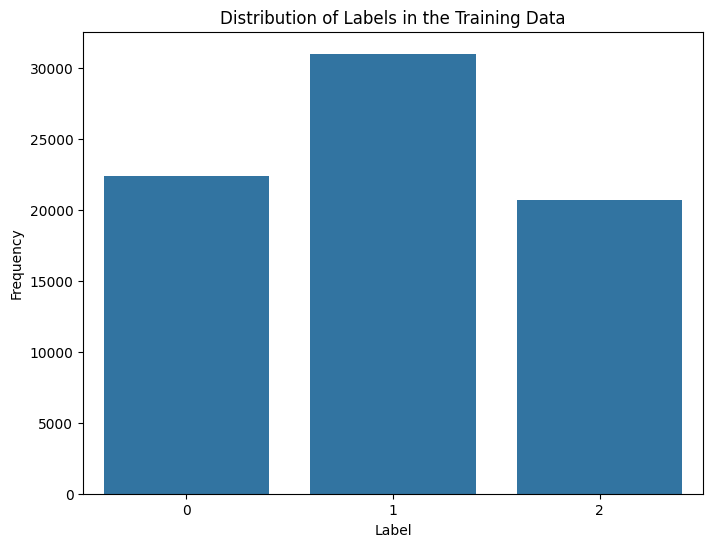

In [ ]:
# prompt: Using dataframe df_train: suggest a plot

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the frequency of each label
label_counts = df_train['label'].value_counts()

# Create a bar plot of the label frequencies
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels in the Training Data')
plt.show()

In [ ]:
df_train.shape

(73996, 2)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    73996 non-null  object
 1   label   73996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
df_train.isnull().sum()

,0
text,0
label,0


In [ ]:
df_train.dropna(inplace=True)

In [ ]:
df_train.isnull().sum()

,0
text,0
label,0


In [ ]:
df_train.shape

(73996, 2)

In [ ]:
df_train["label"] = df_train["label"].astype(int)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    73996 non-null  object
 1   label   73996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


(-0.5, 1439.5, 1079.5, -0.5)

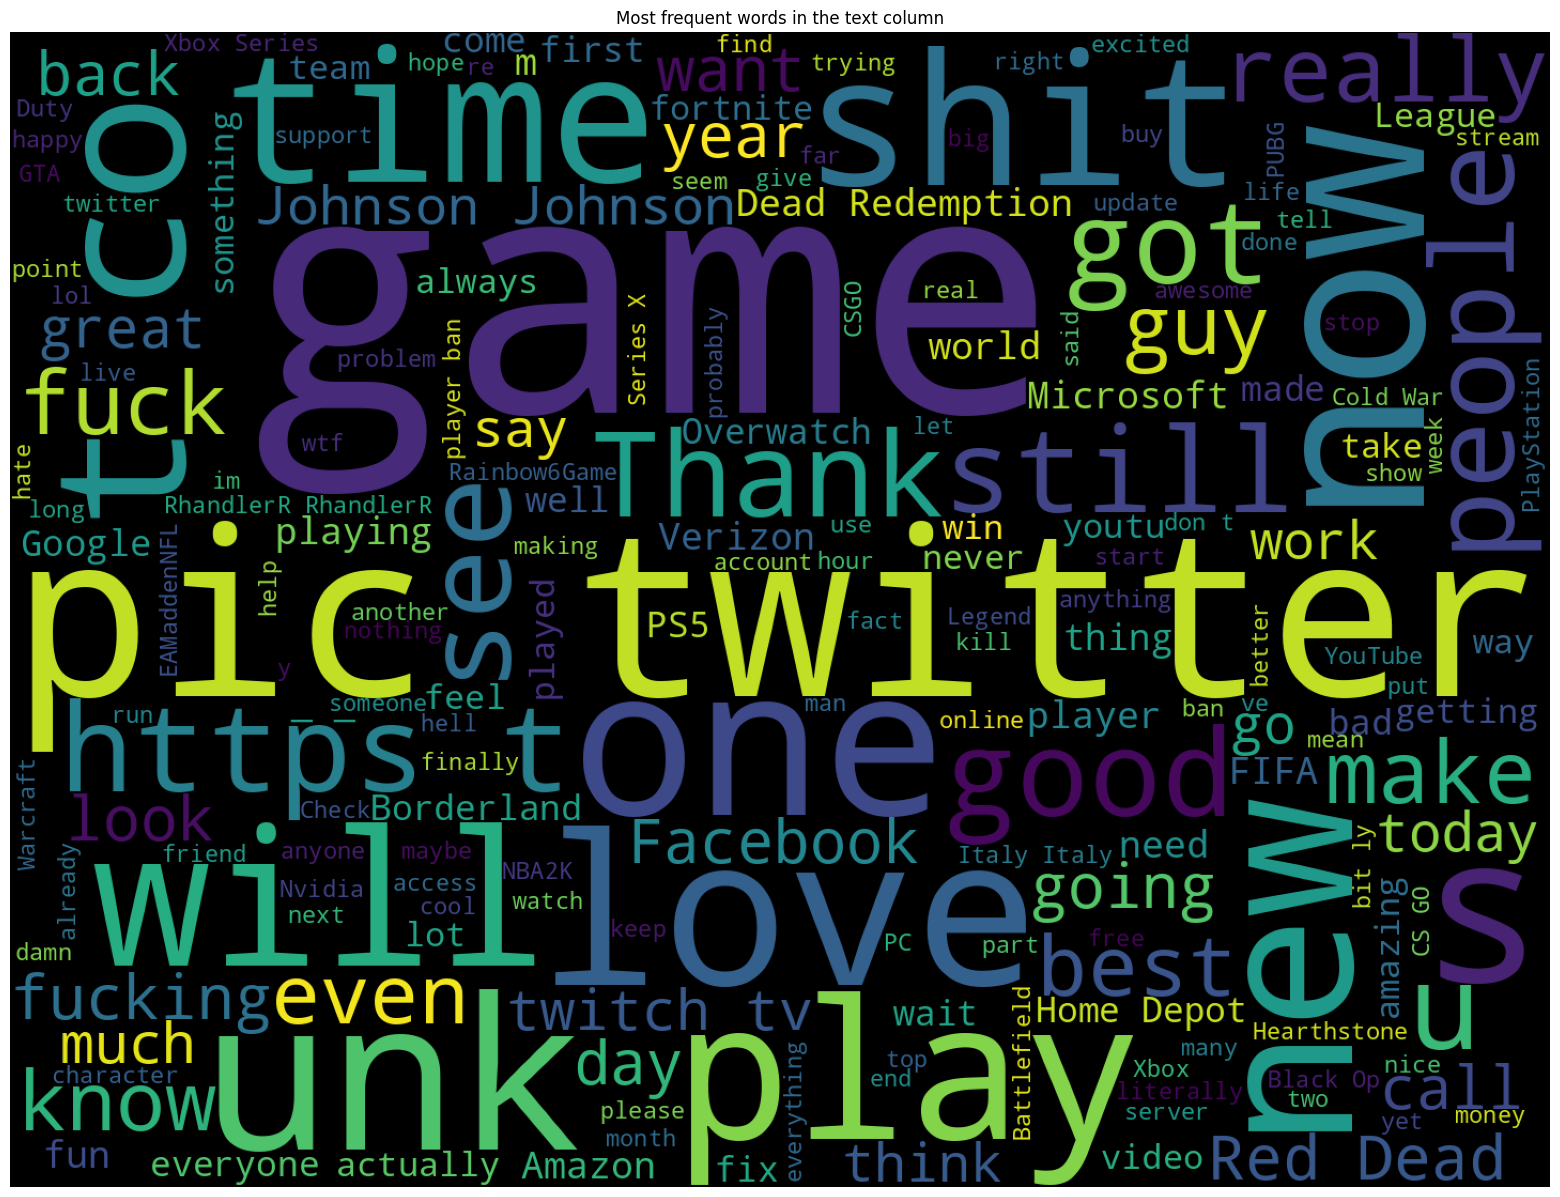

In [ ]:
train_desc = pd.Series(df_train['text'].tolist()).astype(str)
cloud = WordCloud(width=1440, height=1080,stopwords=STOPWORDS).generate(" ".join(train_desc.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.title("Most frequent words in the text column")
plt.axis('off')

WordCloud: Primarily for visualization and can exclude stopwords to improve clarity.

Stopwords Removal: If needed for data cleaning or analysis, it should be done separately as part of preprocessing.







In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

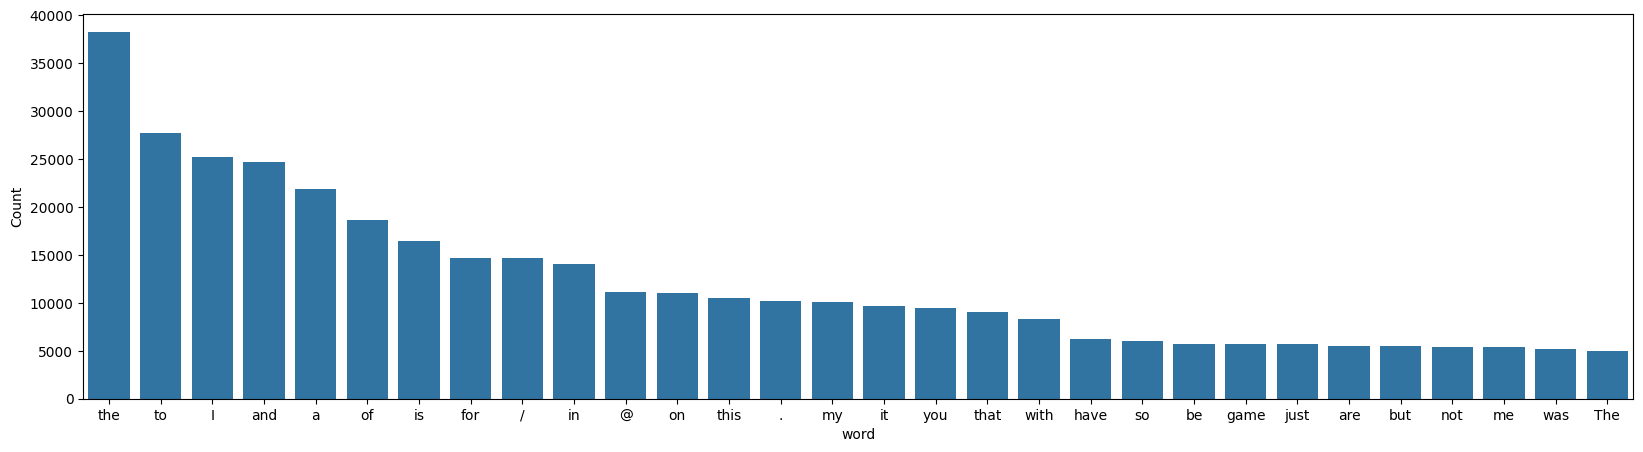

In [ ]:
import nltk
from nltk import FreqDist
freq_words(df_train['text'])

In [ ]:
# remove unwanted characters, numbers and symbols
df_train['text'] = df_train['text'].str.replace("[^a-zA-Z#]", " ")

str.replace("[^a-zA-Z#]", " "):

[^a-zA-Z#]:

This is a regular expression (regex) pattern.
It matches any character except:
Lowercase letters (a-z)
Uppercase letters (A-Z)
The hash symbol (#)
The ^ inside the square brackets means "not". So, this pattern matches anything that is not a letter or #.
" ":

Specifies that all matched characters (i.e., unwanted characters, numbers, or symbols) will be replaced with a space.
What It Removes:

All numbers (e.g., 123)
Punctuation (e.g., ., ,, !, ?)
Special characters (e.g., @, $, %, *, etc.)
Whitespace, letters, and the hash symbol are preserved.

In [ ]:
#Let’s try to remove the stopwords and short words (<2 letters) from the reviews.
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df_train['text'] = df_train['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
sentiment = [remove_stopwords(r.split()) for r in df_train['text']]

# make entire text lowercase
sentiment = [r.lower() for r in sentiment]

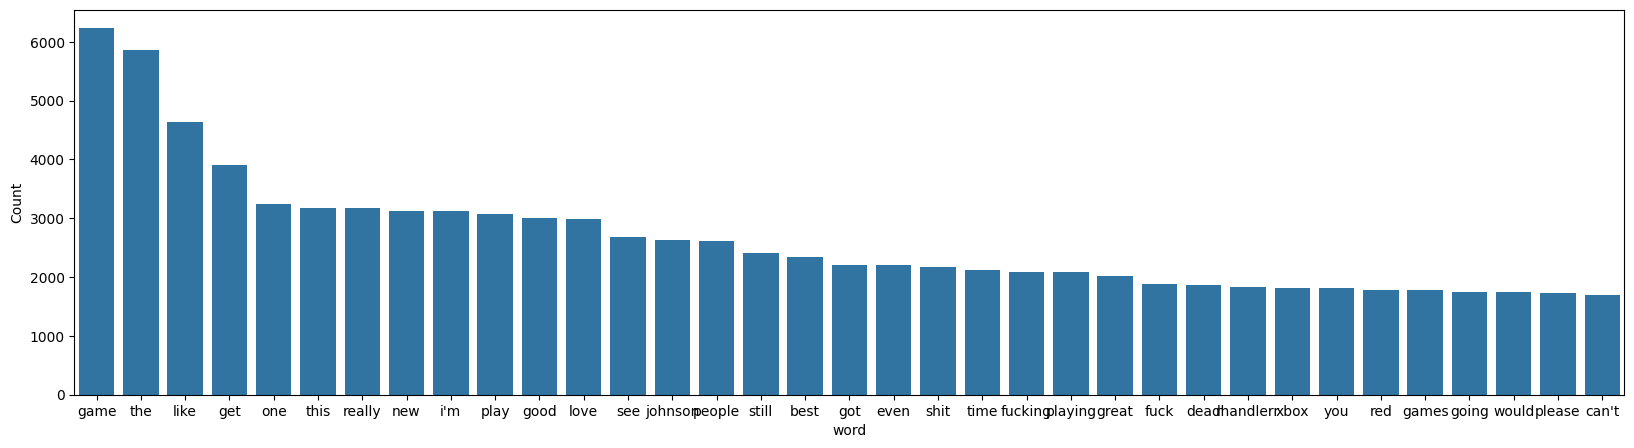

In [ ]:
#Let’s again plot the most frequent words and see if the more significant words have come out.

freq_words(sentiment, 35)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent))
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

spacy.load('en_core_web_sm'): Loads the small English language model (en_core_web_sm) provided by spaCy.


disable=['parser', 'ner']: Disables the dependency parser (parser) and named entity recognition (ner) to save memory and speed up processing, since they're not needed for lemmatization.


In [ ]:
#Let’s tokenize the sentiment and then lemmatize the tokenized sentiment.

tokenized_sentiment = pd.Series(sentiment).apply(lambda x: x.split())
print(tokenized_sentiment[1])

['coming', 'borders', 'kill', 'all,']


In [ ]:
sentiment_2 = lemmatization(tokenized_sentiment)
print(sentiment_2[1]) # print lemmatized review

['border']


Tokenization is necessary to break down text for word-level processing by the lemmatizer.

Detokenization reassembles the processed tokens into a readable and structured format after lemmatization.

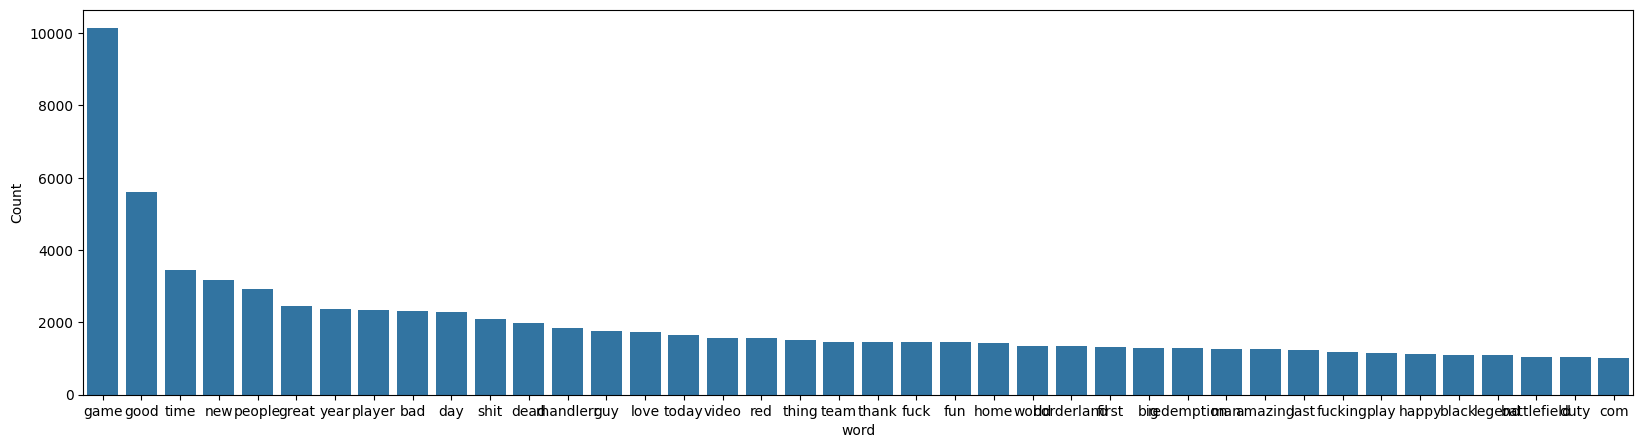

In [ ]:
#As you can see, we have not just lemmatized the words but also filtered only nouns and adjectives. Let’s de-tokenize the lemmatized sentiment and plot the most common words.

sentiment_3 = []
for i in range(len(sentiment_2)):
    sentiment_3.append(' '.join(sentiment_2[i]))

df_train['text'] = sentiment_3

freq_words(df_train['text'], 40)

(-0.5, 1439.5, 1079.5, -0.5)

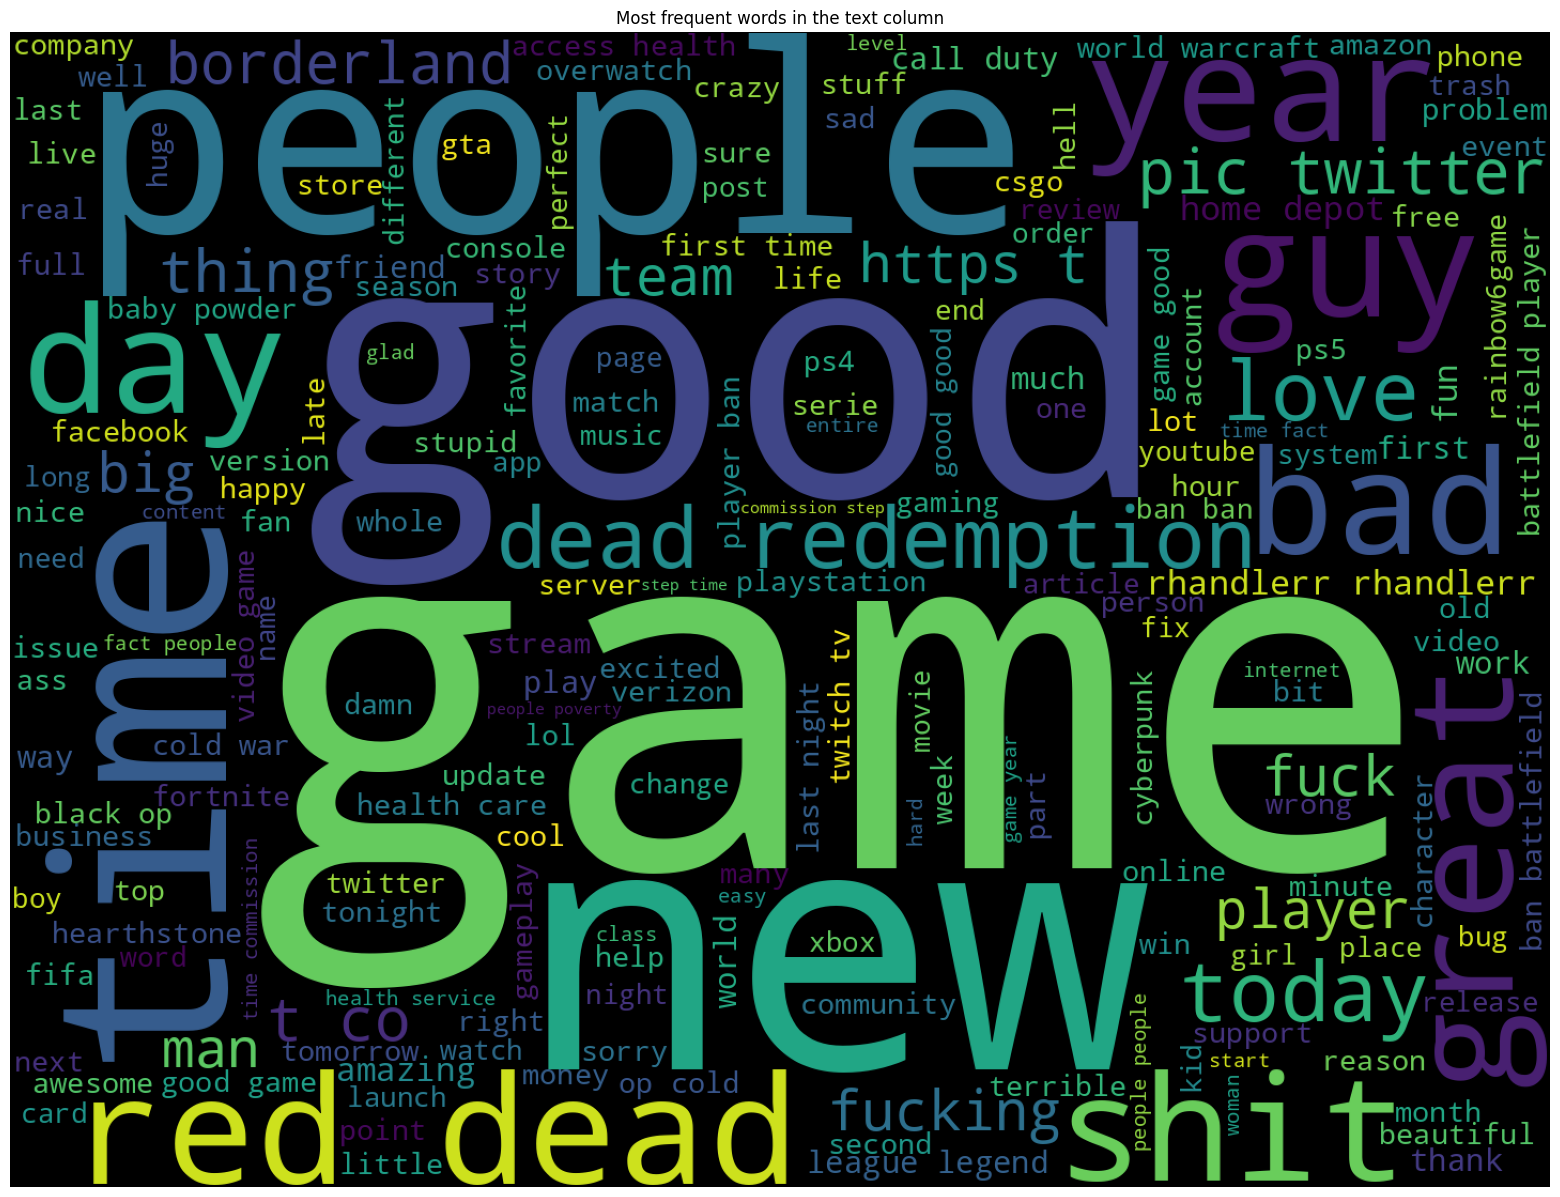

In [ ]:
train_desc = pd.Series(df_train['text'].tolist()).astype(str)
cloud = WordCloud(width=1440, height=1080,stopwords=STOPWORDS).generate(" ".join(train_desc.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.title("Most frequent words in the text column")
plt.axis('off')

#It seems that now most frequent terms in our data are relevant. We can now go ahead and start building our model.

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)



In [ ]:
df_train['text'] = df_train['text'].apply(remove_urls)
df_train.head()

,text,label
0,borderland,2
1,border,2
2,borderland,2
3,borderland murder,2
4,borderland,2


(-0.5, 1439.5, 1079.5, -0.5)

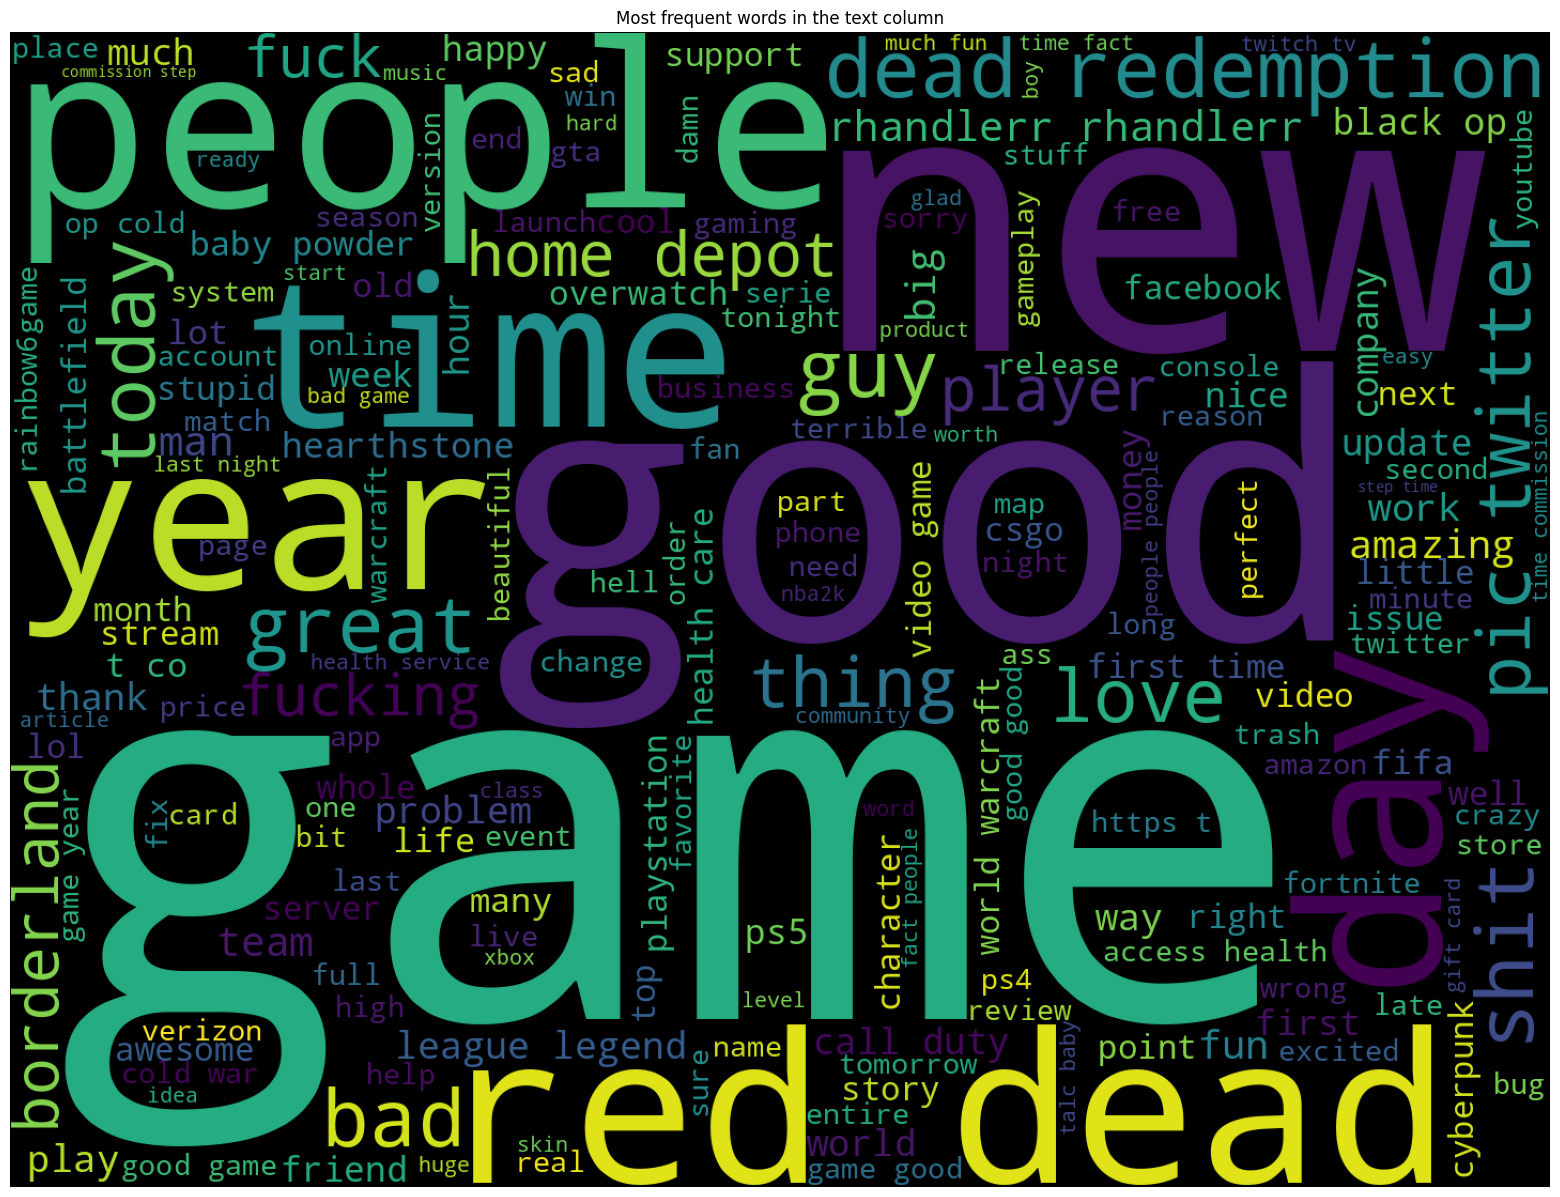

In [ ]:
train_desc = pd.Series(df_train['text'].tolist()).astype(str)
cloud = WordCloud(width=1440, height=1080,stopwords=STOPWORDS).generate(" ".join(train_desc.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.title("Most frequent words in the text column")
plt.axis('off')

In [ ]:
df_train.to_csv('/content/drive/MyDrive/sentiment_analysis_1.csv', index=False)

In [ ]:
df_train.isnull().sum()

,0
text,0
label,0


In [ ]:
# Check how many rows have an empty list in the 'text' column
empty_list_count = df_train[df_train['text'].apply(lambda x: x == [])].shape[0]
print(f"Number of rows with empty lists: {empty_list_count}")


Number of rows with empty lists: 5353


In [ ]:
# Remove rows where 'text' column contains an empty list
df_train = df_train[df_train['text'].apply(lambda x: x != [])]

# Verify the change
print(df_train.shape)


(55768, 2)


In [ ]:
print(df_train['text'].apply(lambda x: x == []).sum())  # Should print 0


0


In [ ]:
df_train.to_csv('/content/drive/MyDrive/sentiment_analysis_1.csv', index=False)